In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea
import torch
import torch.nn as nn
import torch.optim as optim
plt.rcParams.update({'font.size': 15})
from torch.utils.data import DataLoader, TensorDataset

In [10]:
time_dur = 1000
Nsyn = 4

def kernel(tau_rise, tau_decay):
    T = np.arange(time_dur)
    y = (1 - np.exp(-T / tau_rise)) * np.exp(-T / tau_decay)
    return y

def model(X, Omega, Tau_rise, Tau_decay, K, v0):
    # X is one sample here
    Y = np.zeros(time_dur)
    L = np.zeros((Nsyn, time_dur))
    for i in range(Nsyn):
        ker = kernel(Tau_rise[i], Tau_decay[i])
        L[i] = Omega[i]*np.convolve(X[i], ker)[:time_dur]
        Y += L[i]
        if i > 0:
            for j in range(i):
                Y += -K[int(i*(i-1)/2)+j] * L[i] * L[j]
    return Y + v0

def hlm(X, Omega, Tau_rise, Tau_decay, K, v0):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model(X[i], Omega, Tau_rise, Tau_decay, K, v0)
    return Y

def model_l(X, Omega, Tau_rise, Tau_decay, v0):
    # X is one sample here
    Y = np.zeros(time_dur)
    L = np.zeros((Nsyn, time_dur))
    for i in range(Nsyn):
        ker = kernel(Tau_rise[i], Tau_decay[i])
        L[i] = Omega[i]*np.convolve(X[i], ker)[:time_dur]
        Y += L[i]
    return Y + v0

def hlm_l(X, Omega, Tau_rise, Tau_decay, v0):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model_l(X[i], Omega, Tau_rise, Tau_decay, v0)
    return Y

In [11]:
Vars1 = np.array([2.1, 2.1, -1.6, -1.6, 
                 2, 2, 3, 3, 
                 20, 20, 20, 20, 
                 0, 
                 0,-0.05, 
                 -0.05, 0, 0, 
                 0])

In [12]:
X = np.zeros((4, 1000))
X[0, 0] = 1
X[2, 0] = 1 
X2 = np.zeros((4, 1000))
X2[1, 0] = 1
X2[2, 0] = 1
X2[0, 0] = 1
X2[3, 0] = 1

In [13]:
V1 = model(X, Vars1[0:4], Vars1[4:8], Vars1[8:12], Vars1[12:18], Vars1[18])
V2 = model(X2, Vars1[0:4], Vars1[4:8], Vars1[8:12], Vars1[12:18], Vars1[18])

(-4.95, 103.95, -0.04725500139708059, 0.9923550293386924)

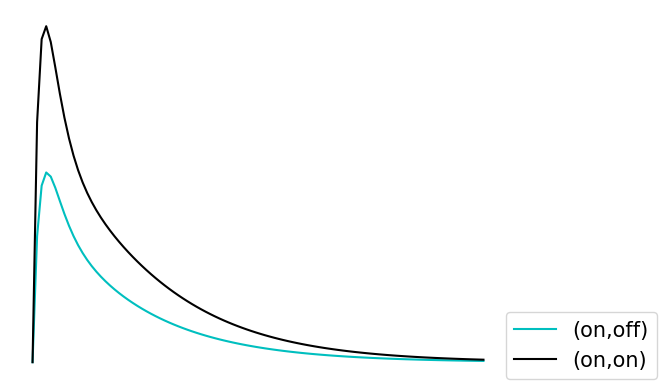

In [14]:
plt.plot(V1[:100], label='(on,off)', c='c')
plt.plot(V2[:100], label='(on,on)', c='black')
plt.legend(loc=(1,0))
plt.axis('off')
# plt.savefig('figure/XOR_single_2.png', dpi=800, bbox_inches='tight')

In [15]:
# 生成随机 0-1 数组
p1 = 0.6  # 前两行 1 出现的概率为 0.6
p2 = 0.4  # 后两行 1 出现的概率为 0.4
n_cols = 1000  # 列数
n_ones = 400  # 每行 1 的数量
arr = np.zeros((4, n_cols), dtype=int)
arr[0, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[1, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[2, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1
arr[3, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1
X1 = np.zeros((4, 1000))
X2 = np.zeros((4, 1000))
X3 = np.zeros((4, 1000))
X1 = arr
X2[0] = arr[0]
X2[2] = arr[2]
X3[1] = arr[1]
X3[3] = arr[3]

In [18]:
V1 = model(X1, Vars1[0:4], Vars1[4:8], Vars1[8:12], Vars1[12:18], Vars1[18])
V2 = model(X2, Vars1[0:4], Vars1[4:8], Vars1[8:12], Vars1[12:18], Vars1[18])
V3 = model(X3, Vars1[0:4], Vars1[4:8], Vars1[8:12], Vars1[12:18], Vars1[18])
# V2[165] = 60
# V2[654] = 60
# V3[700:715] -= 1
# V3[782] = 60
# V3[886] = 60
# V3[915] = 60
# V3[930] = 60

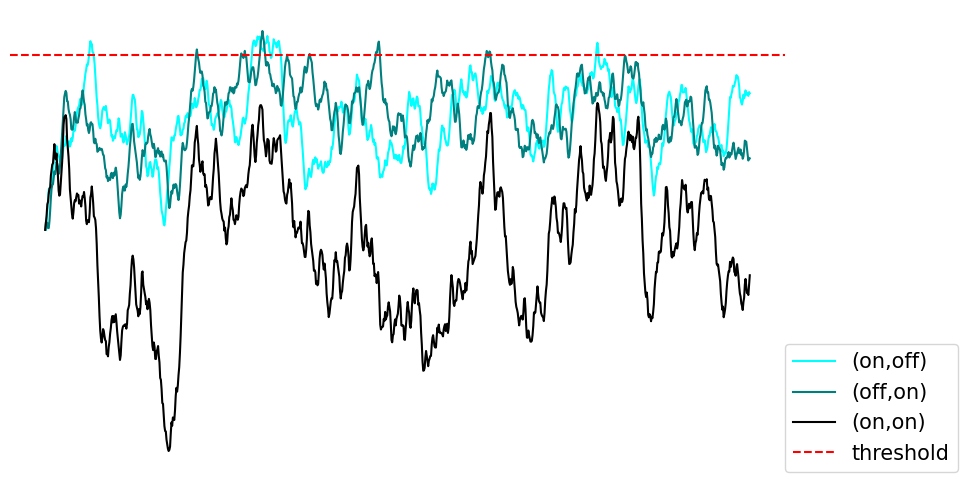

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(V2, label='(on,off)', c='#00ffff')
plt.plot(V3, label='(off,on)', c='#007f7f')
plt.plot(V1, label='(on,on)', c='black')
plt.axhline(y=18, color='r', linestyle='--', label='threshold')
# plt.axvline(x=782, color='r', linestyle='--')
plt.legend(loc=(1,0))
plt.axis('off')
plt.savefig('figure/XOR_all_no_spike.png', dpi=800, bbox_inches='tight')

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(V2, label='(on,off)', c='#00ffff')
plt.plot(V3, label='(off,on)', c='#007f7f')
plt.plot(V1, label='(on,on)', c='black')
plt.axhline(y=19.5, color='r', linestyle='--', label='threshold')
# plt.axvline(x=782, color='r', linestyle='--')
plt.legend(loc=(1,0))
plt.axis('off')
plt.ylim(-25, 65)
# plt.savefig('figure/XOR_all_4.png', dpi=800, bbox_inches='tight')

NameError: name 'V2' is not defined

<Figure size 1000x600 with 0 Axes>

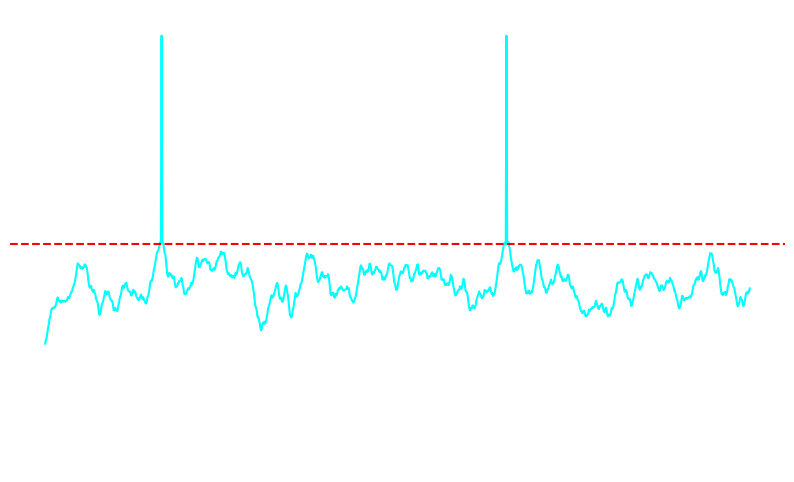

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(V2, label='(on,off)', c='#00ffff')
# plt.plot(V3, label='(off,on)', c='#007f7f')
# plt.plot(V1, label='(on,on)', c='black')
plt.axhline(y=19.5, color='r', linestyle='--', label='threshold')
# plt.axvline(x=782, color='r', linestyle='--')
# plt.legend(loc=(1,0))
plt.axis('off')
plt.ylim(-25, 65)
plt.savefig('figure/XOR_all_5.png', dpi=800, bbox_inches='tight')

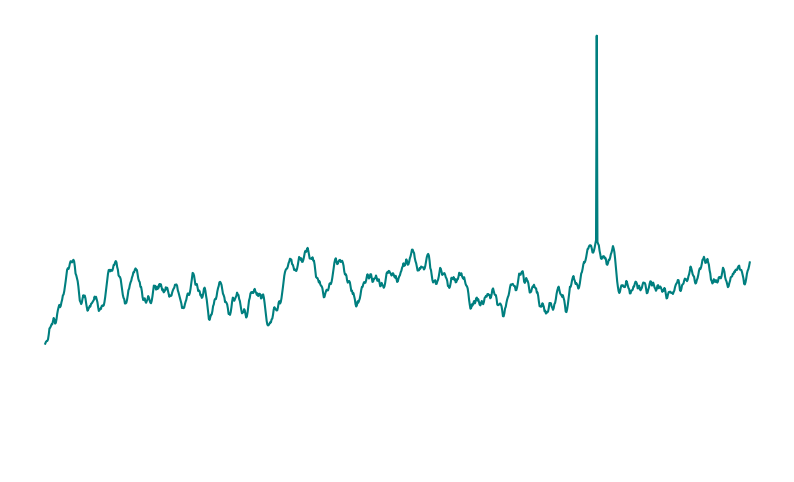

In [39]:
plt.figure(figsize=(10, 6))
# plt.plot(V2, label='(on,off)', c='#00ffff')
plt.plot(V3, label='(off,on)', c='#007f7f')
# plt.plot(V1, label='(on,on)', c='black')
# plt.axhline(y=19.5, color='r', linestyle='--', label='threshold')
# plt.axvline(x=782, color='r', linestyle='--')
# plt.legend(loc=(1,0))
plt.axis('off')
plt.ylim(-25, 65)
plt.savefig('figure/XOR_all_6.png', dpi=800, bbox_inches='tight')

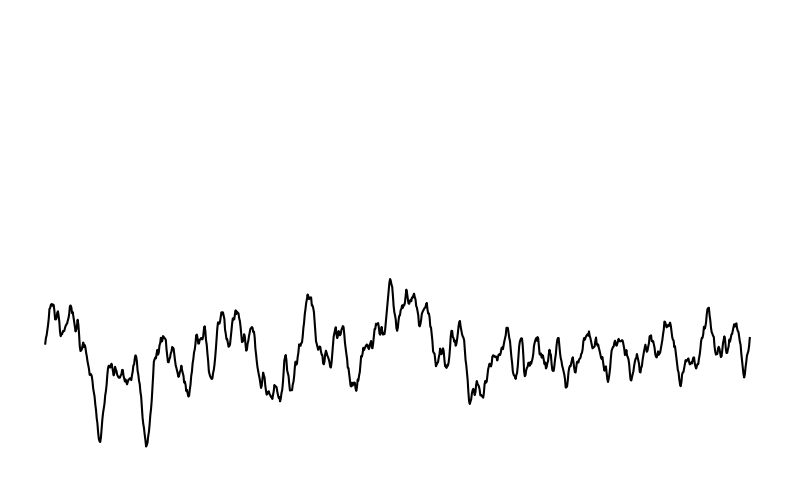

In [40]:
plt.figure(figsize=(10, 6))
# plt.plot(V2, label='(on,off)', c='#00ffff')
# plt.plot(V3, label='(off,on)', c='#007f7f')
plt.plot(V1, label='(on,on)', c='black')
# plt.axhline(y=19.5, color='r', linestyle='--', label='threshold')
# plt.axvline(x=782, color='r', linestyle='--')
# plt.legend(loc=(1,0))
plt.axis('off')
plt.ylim(-25, 65)
plt.savefig('figure/XOR_all_7.png', dpi=800, bbox_inches='tight')

In [4]:
k = -0.05
Vars1 = np.array([2.1, 2.1, 2.1, 2.1, -1.6, -1.6, -1.6, -1.6, 
                 2, 2, 2, 2, 3, 3, 3, 3,
                 20, 20, 20, 20, 20, 20, 20, 20, 
                 0, 
                 0, 0, 
                 0, 0, 0,
                 k, 0, k, 0,
                 0, k, 0, k, 0,
                 k, 0, k, 0, 0, 0,
                 0, k, 0, k, 0, 0, 0,
                 0])

In [5]:
# 生成随机 0-1 数组
p1 = 0.6  # 前两行 1 出现的概率为 0.6
p2 = 0.3  # 后两行 1 出现的概率为 0.4
n_cols = 1000  # 列数
n_ones = 400  # 每行 1 的数量
arr = np.zeros((8, n_cols), dtype=int)

arr[0, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[1, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[2, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[3, np.random.choice(n_cols, int(n_cols*p1), replace=False)] = 1
arr[4, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1
arr[5, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1
arr[6, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1
arr[7, np.random.choice(n_cols, int(n_cols*p2), replace=False)] = 1

X13 = np.zeros((8, 1000))
X24 = np.zeros((8, 1000))
X14 = np.zeros((8, 1000))
X23 = np.zeros((8, 1000))

X13[0] = arr[0]
X13[2] = arr[2]
X13[4] = arr[4]
X13[6] = arr[6]

X24[1] = arr[1]
X24[3] = arr[3]
X24[5] = arr[5]
X24[7] = arr[7]

X14[0] = arr[0]
X14[3] = arr[3]
X14[4] = arr[4]
X14[7] = arr[7]

X23[2] = arr[2]
X23[3] = arr[3]
X23[5] = arr[5]
X23[6] = arr[6]

In [6]:
V13 = model(X13, Vars1[0:8], Vars1[8:16], Vars1[16:24], Vars1[24:52], Vars1[52])
V24 = model(X24, Vars1[0:8], Vars1[8:16], Vars1[16:24], Vars1[24:52], Vars1[52])
V14 = model(X14, Vars1[0:8], Vars1[8:16], Vars1[16:24], Vars1[24:52], Vars1[52])
V23 = model(X23, Vars1[0:8], Vars1[8:16], Vars1[16:24], Vars1[24:52], Vars1[52])
V23[38] = 80
V14[860] = 80

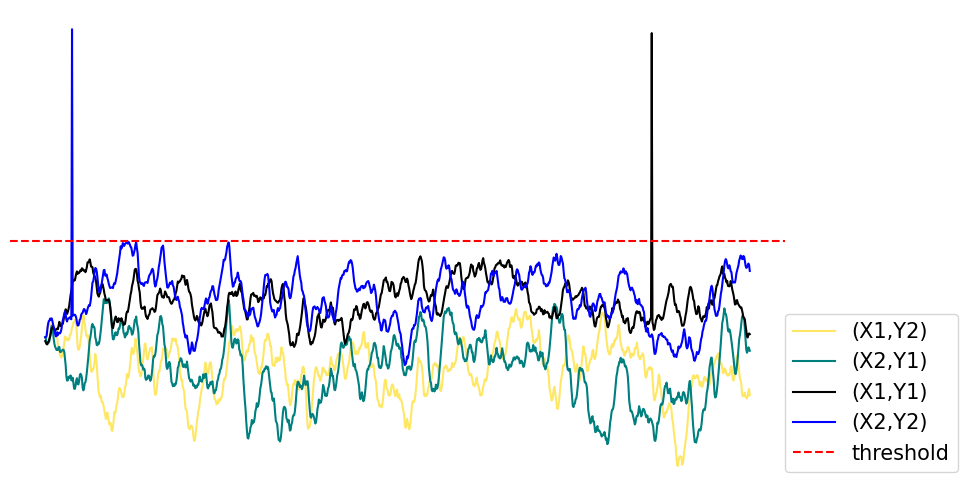

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(V24, label='(X1,Y2)', c='#ffe766')
plt.plot(V13, label='(X2,Y1)', c='#007f7f')
plt.plot(V14-1, label='(X1,Y1)', c='black')
plt.plot(V23, label='(X2,Y2)', c='blue')
plt.axhline(y=25, color='r', linestyle='--', label='threshold')
# plt.axvline(x=860, color='r', linestyle='--')
plt.legend(loc=(1,0))
plt.axis('off')
plt.ylim(-35, 85)
plt.savefig('figure/XOR_Hausser_2.png', dpi=800, bbox_inches='tight')